In [55]:
import pandas as pd
import yaml
import seaborn as sns
import matplotlib.pyplot as plt

with open('../params/configs/data_path.yaml', 'r') as fp:
	data_path = yaml.load(fp)
df_oder_item = pd.read_csv(data_path['olist_order_items_dataset'])
df_product = pd.read_csv(data_path['olist_products_dataset'])
df_orders = pd.read_csv(data_path['olist_orders_dataset'])
translation = pd.read_csv(data_path['product_category_name_translation'])
df = pd.merge(df_product, df_oder_item, on='product_id')
df = pd.merge(df, df_orders, on='order_id')
df = pd.merge(df, translation, on='product_category_name')
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], errors='coerce')
df['order_approved_at_ym'] = df['order_approved_at'].dt.to_period('M')
df['order_approved_at_ym'] = df['order_approved_at'].dt.to_period('M')
df['order_approved_at_ymd'] = df['order_approved_at'].dt.to_period('d')
df.sort_values(by="order_approved_at_ym", inplace=True)
df.sort_values(by="order_approved_at_ymd", inplace=True)

C:\Users\Verner\miniconda3\envs\tp\lib\site-packages\ipykernel_launcher.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  import sys


In [56]:
df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name_english,order_approved_at_ym,order_approved_at_ymd
62731,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,bfbd0f9bdef84302105ad712db648a6c,...,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,health_beauty,2016-09,2016-09-15
62732,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,bfbd0f9bdef84302105ad712db648a6c,...,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,health_beauty,2016-09,2016-09-15
62733,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,bfbd0f9bdef84302105ad712db648a6c,...,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,health_beauty,2016-09,2016-09-15
4803,9c7bdf67b06b419aefb93cfdfc96c55d,esporte_lazer,25.0,823.0,1.0,476.0,17.0,14.0,14.0,65d1e226dfaeb8cdc42f665422522d14,...,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00,sports_leisure,2016-10,2016-10-04
32928,85b99d83c60cab5b4d8f927ad35212a1,moveis_decoracao,50.0,1017.0,1.0,2100.0,30.0,24.0,25.0,63638a6806d67773f3adba8534553fff,...,16e14c1e6e050fe6730c961ff638ca23,delivered,2016-10-04 13:22:56,2016-10-04 13:47:45,2016-11-17 15:53:01,2016-11-25 13:17:37,2016-11-28 00:00:00,furniture_decor,2016-10,2016-10-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51187,2c2b6a28924791234bd386bddb17512e,construcao_ferramentas_seguranca,56.0,498.0,1.0,1008.0,33.0,14.0,26.0,8a9adc69528e1001fc68dd0aaebbb54a,...,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00,construction_tools_safety,NaT,NaT
72152,4fd676d9c4723d475026e40aeae56957,ferramentas_jardim,44.0,441.0,3.0,4300.0,36.0,13.0,20.0,2eecb0d85f281280f79fa00f9cec1a95,...,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00,garden_tools,NaT,NaT
84092,8c5876b1c7768217964f353bc7e64393,telefonia,61.0,440.0,1.0,250.0,18.0,3.0,28.0,88083e8f64d95b932164187484d90212,...,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21 00:00:00,telephony,NaT,NaT
84093,8c5876b1c7768217964f353bc7e64393,telefonia,61.0,440.0,1.0,250.0,18.0,3.0,28.0,88083e8f64d95b932164187484d90212,...,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21 00:00:00,telephony,NaT,NaT


In [57]:
df.product_id.value_counts()[:10]

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: product_id, dtype: int64

In [58]:
# df = df[df.groupby('product_id')['product_id'].transform('size')>273]

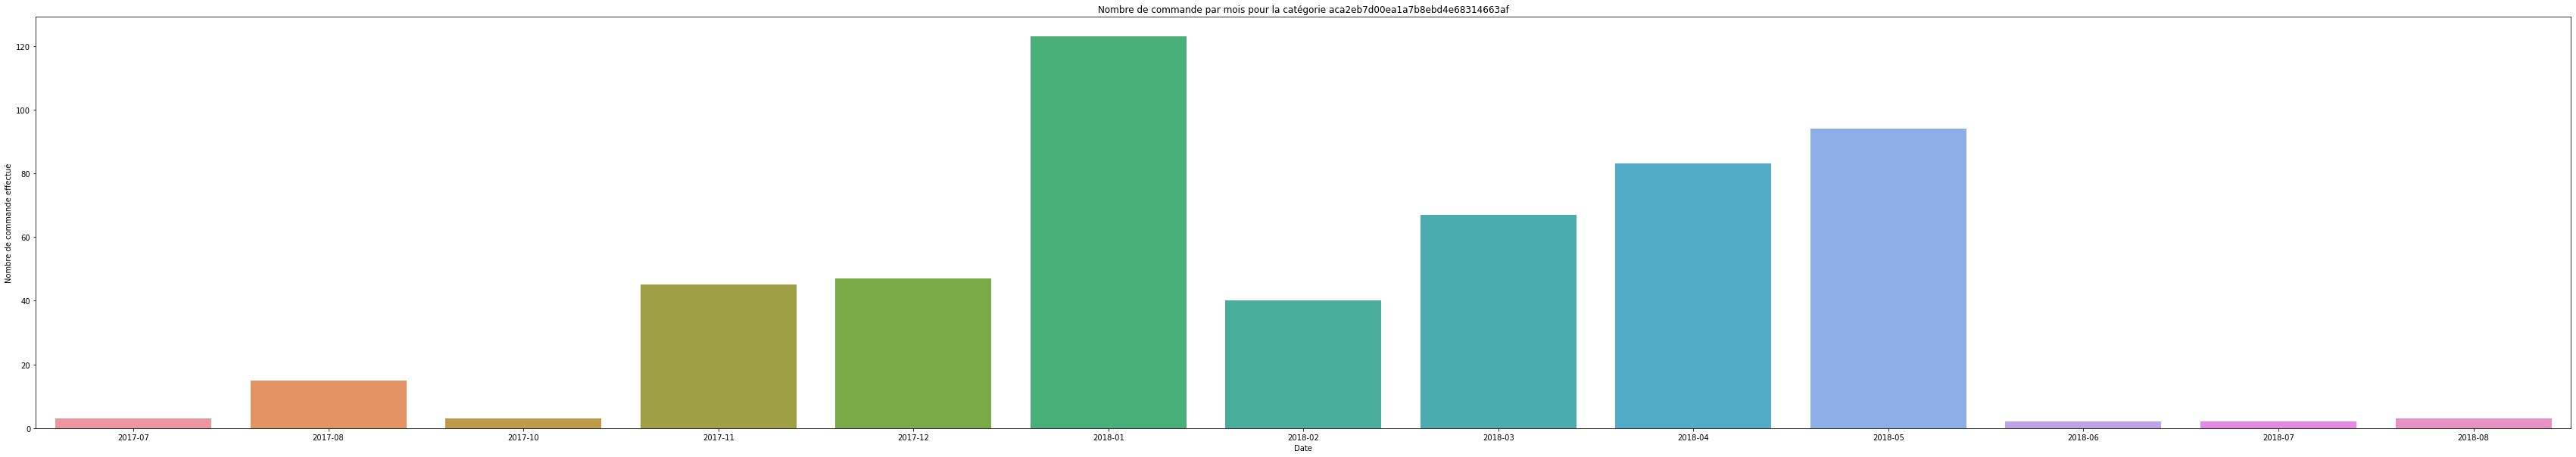

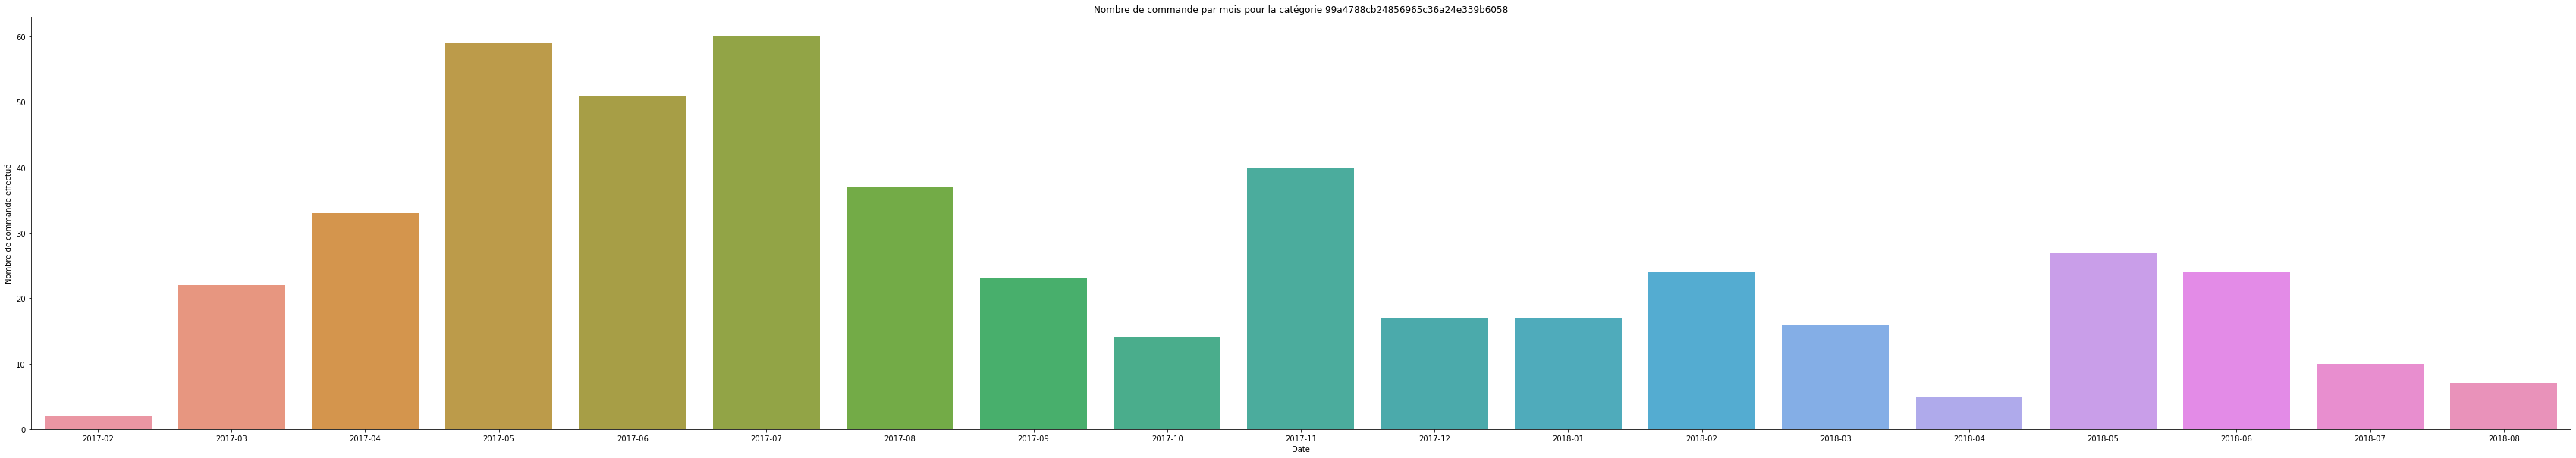

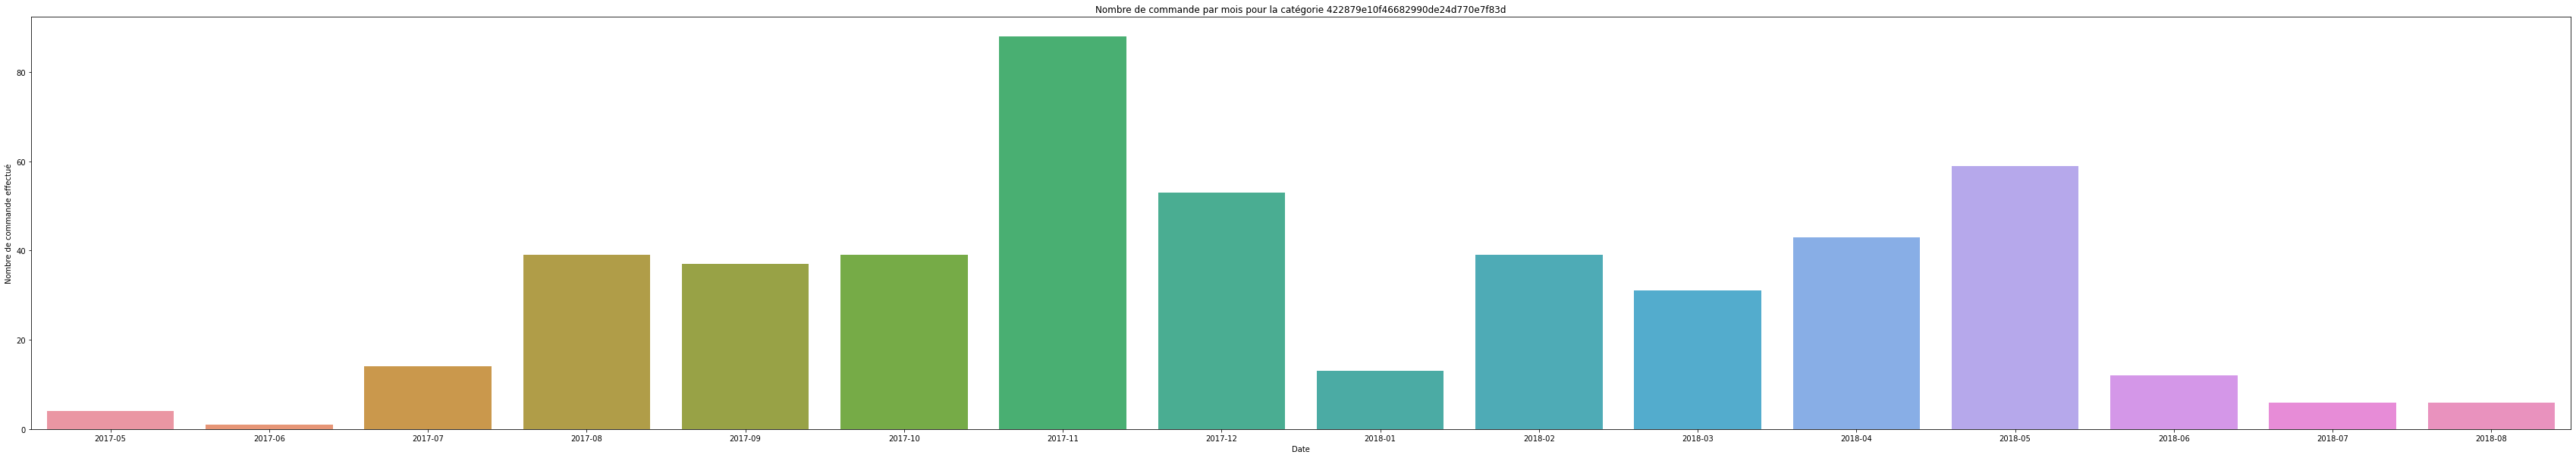

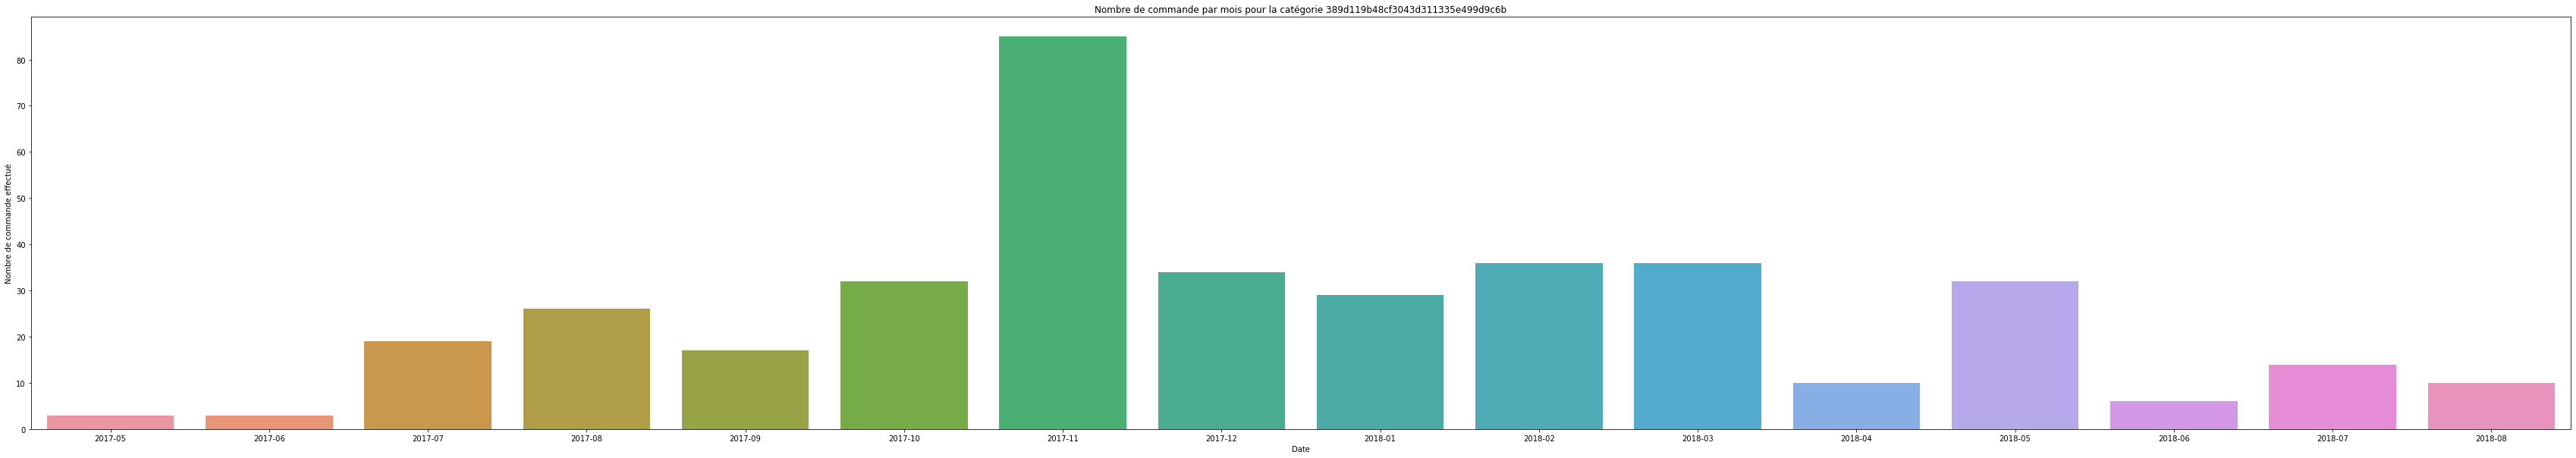

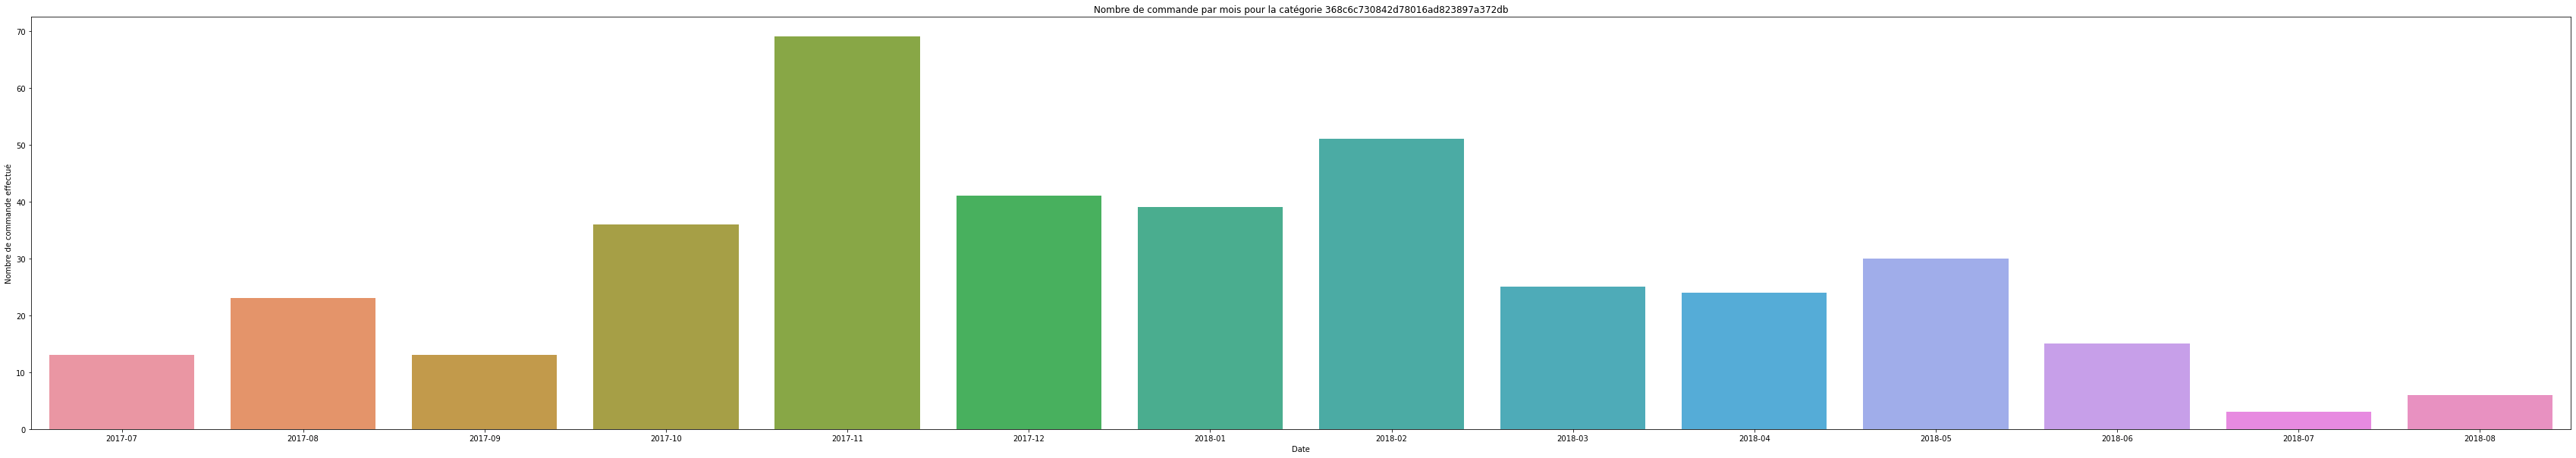

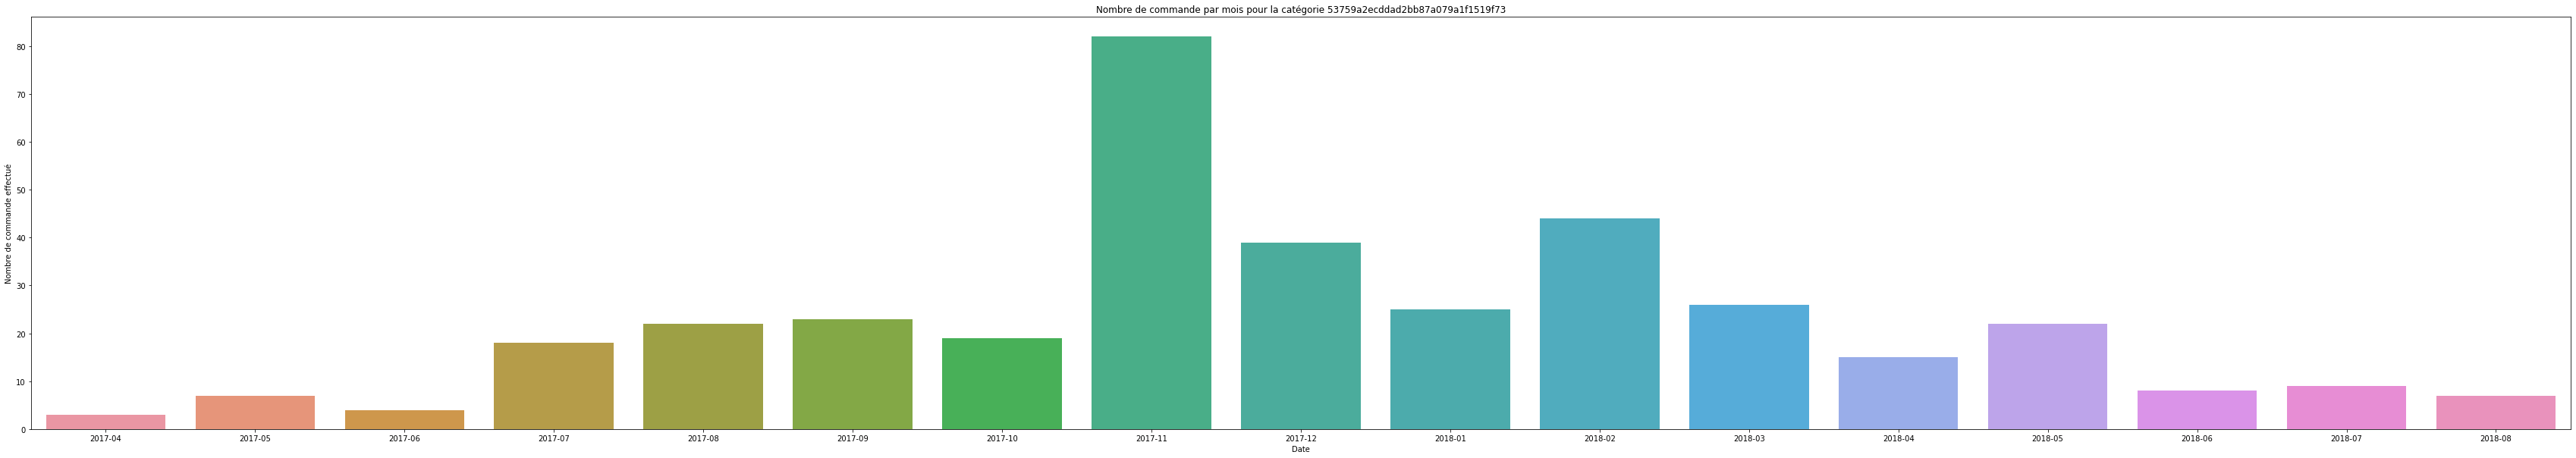

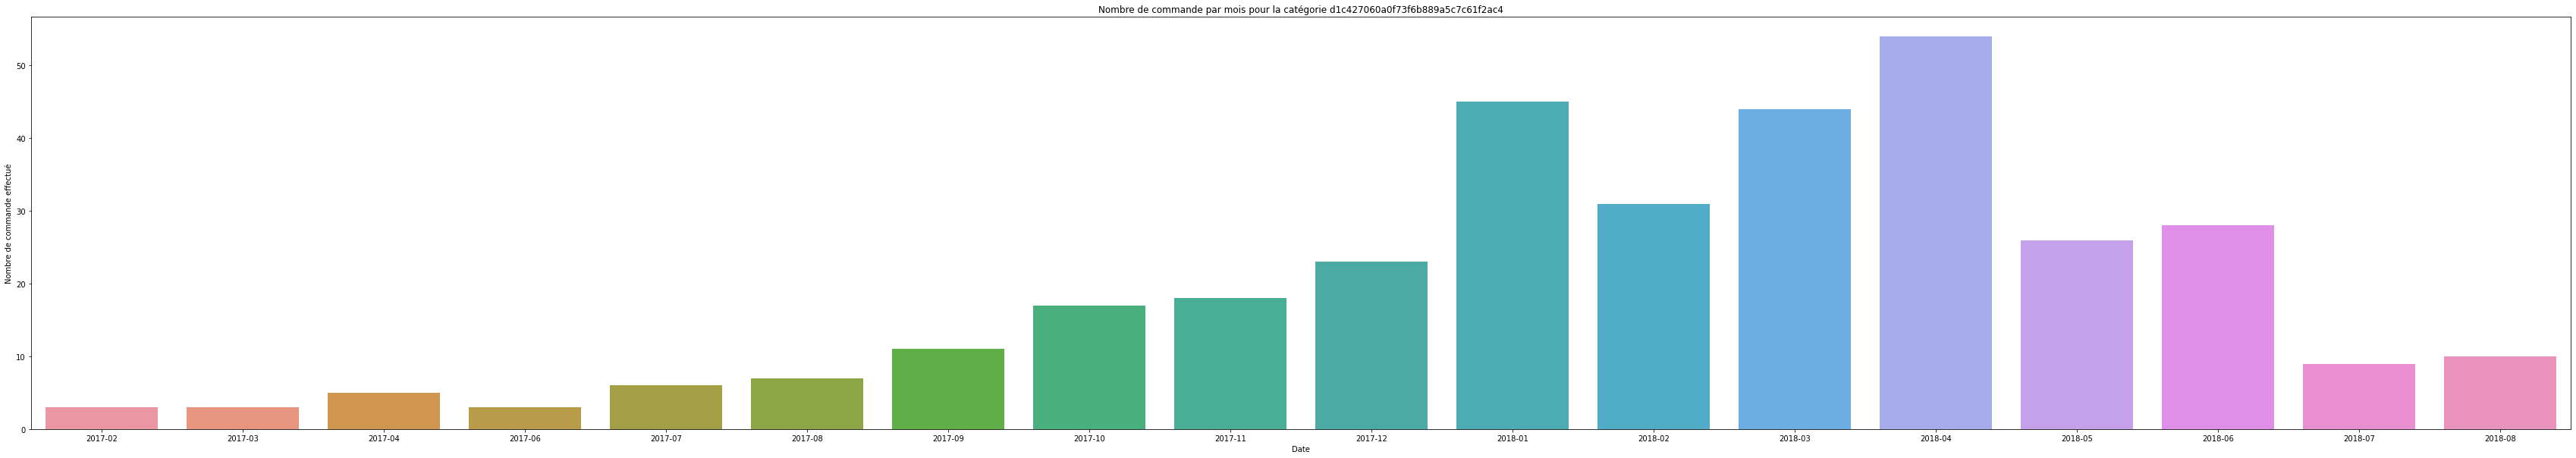

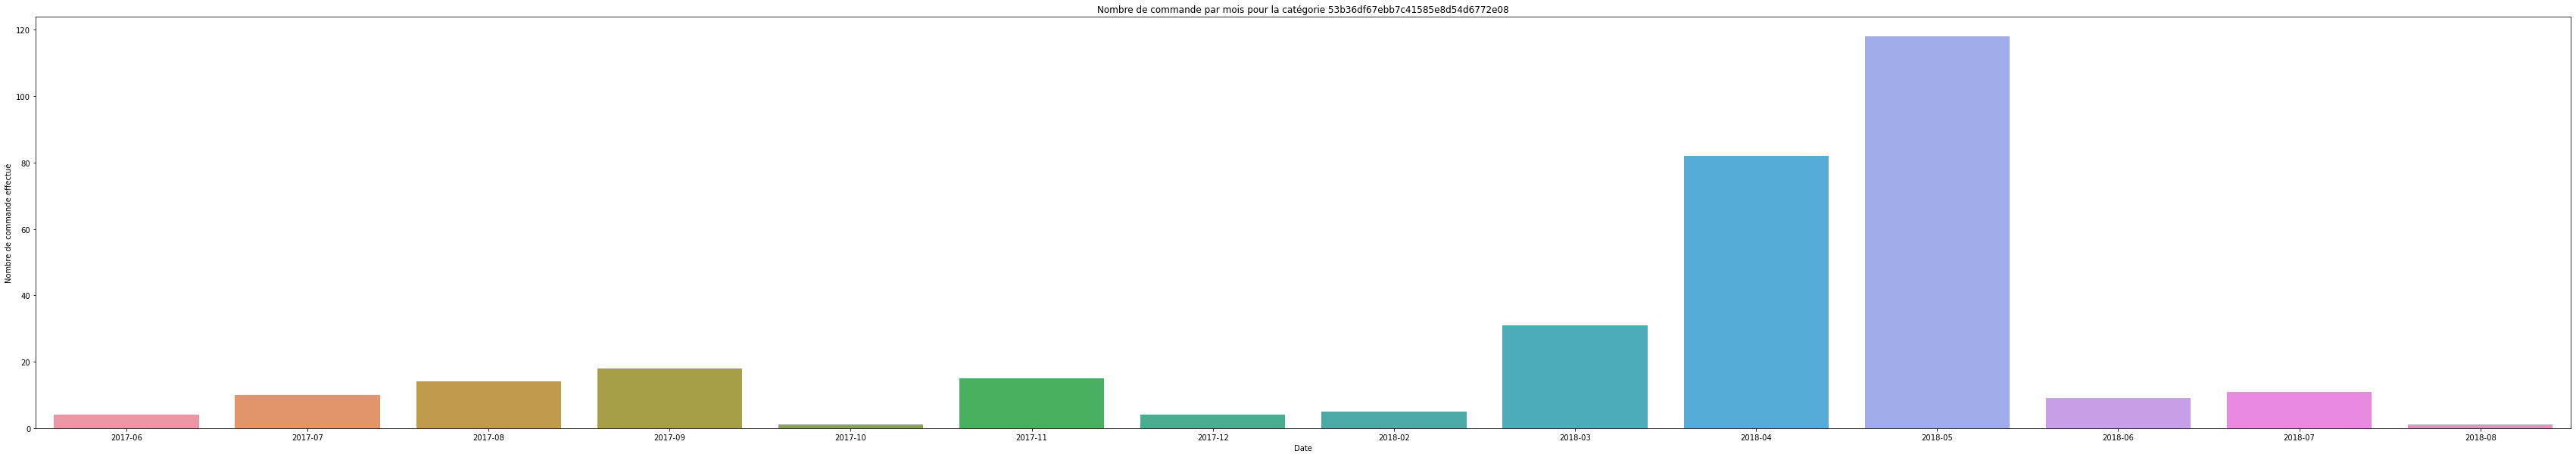

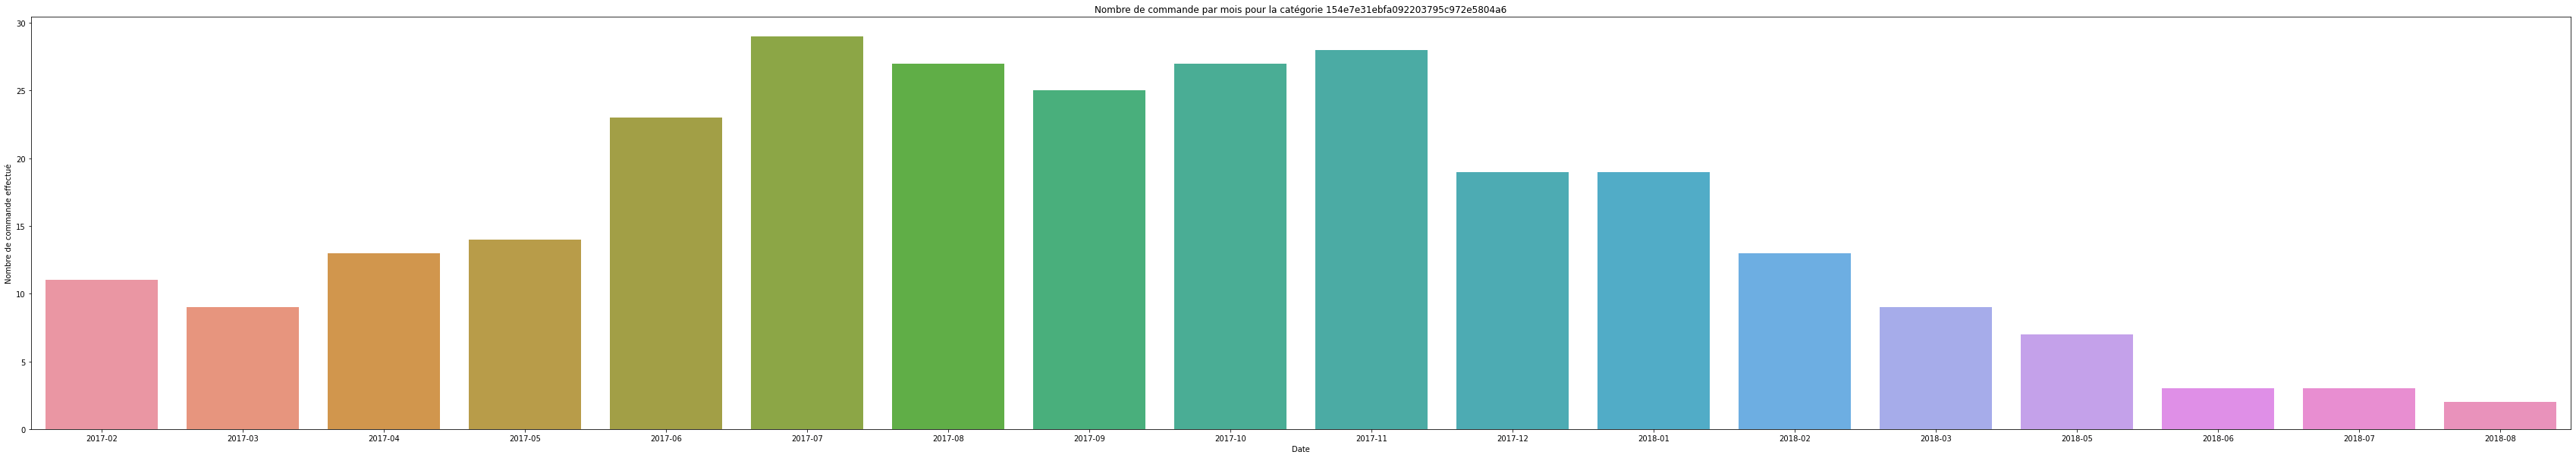

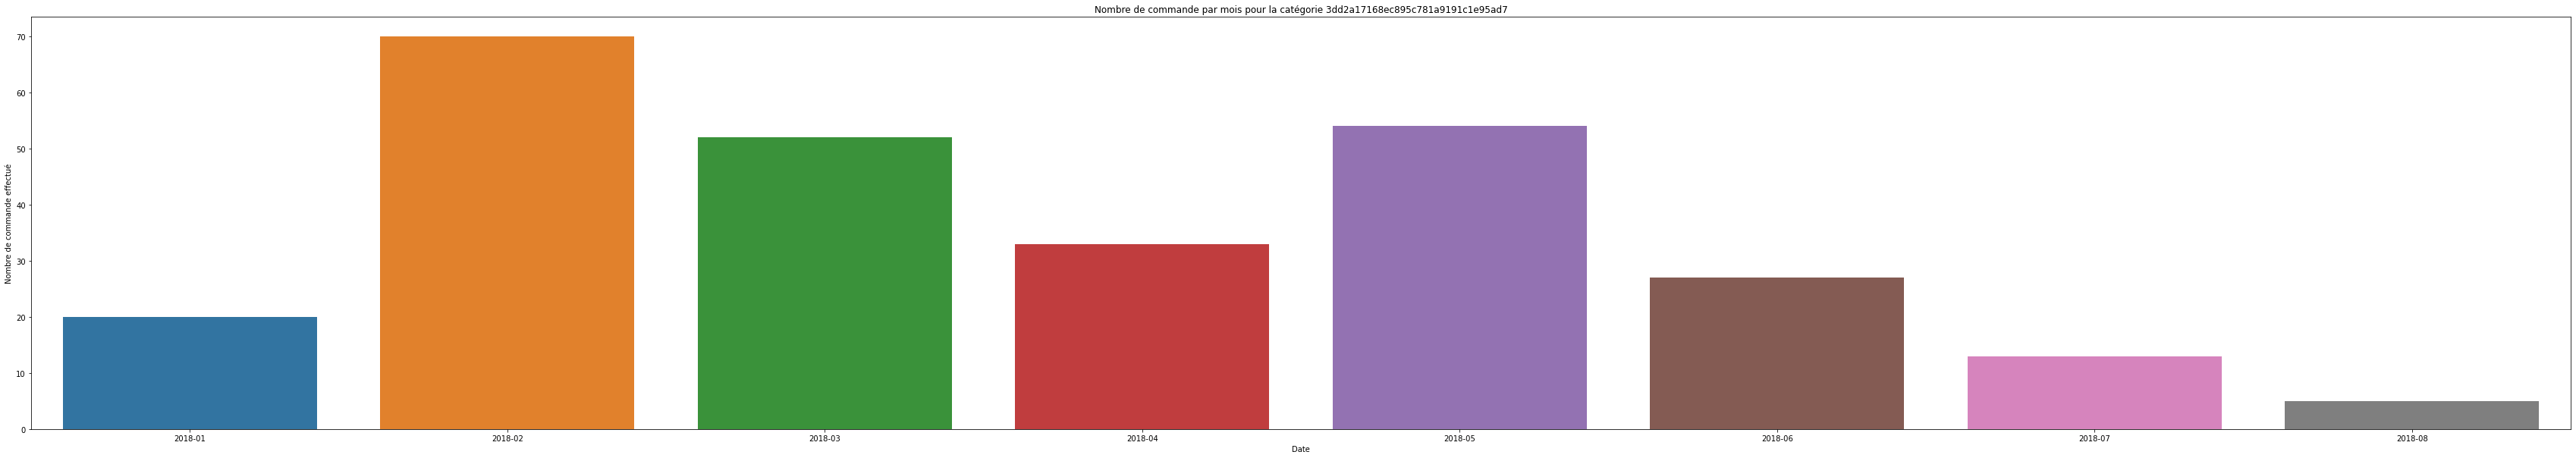

In [59]:

category_count = df['product_id'].value_counts()
category_list = category_count[category_count>273].index.tolist()
for i in category_list:
    df_tmp = df[df['product_id']==i]
    plt.figure(figsize=(60,10))
    sns.countplot(data=df_tmp, x='order_approved_at_ym')
    plt.ylabel("Nombre de commande effectué")
    plt.xlabel("Date")
    plt.title("Nombre de commande par mois pour l'article %s" % i)
    plt.show()

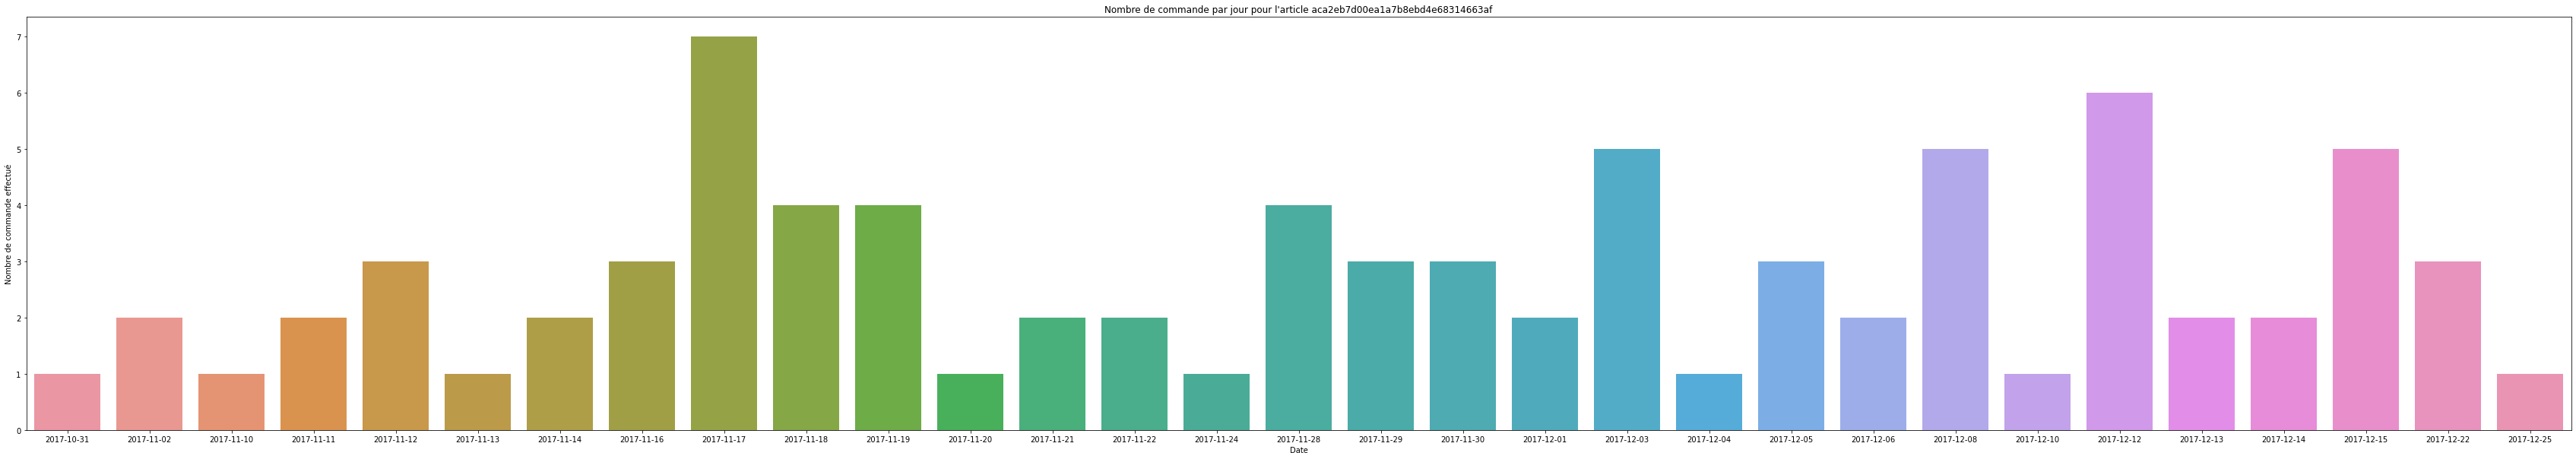

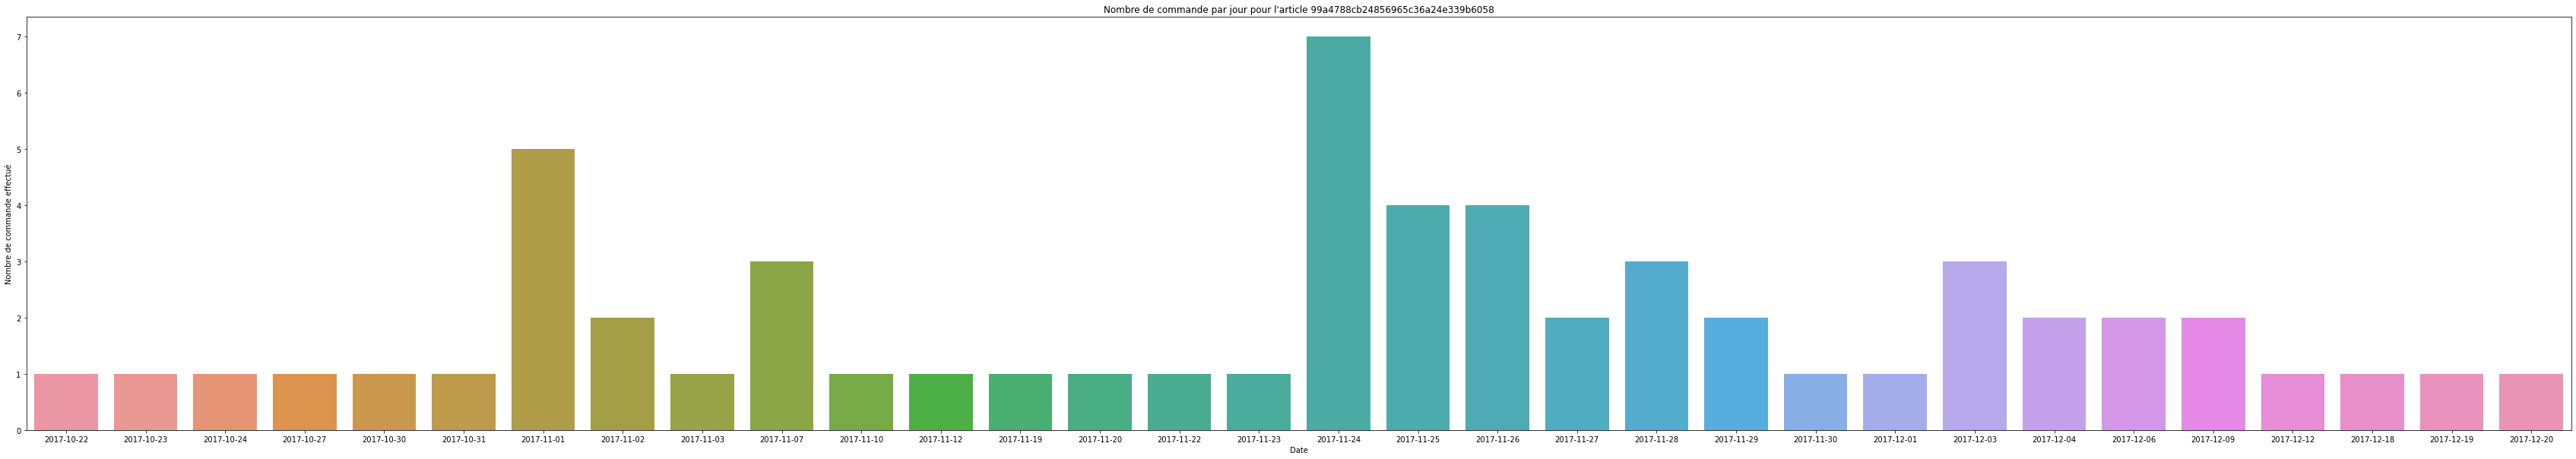

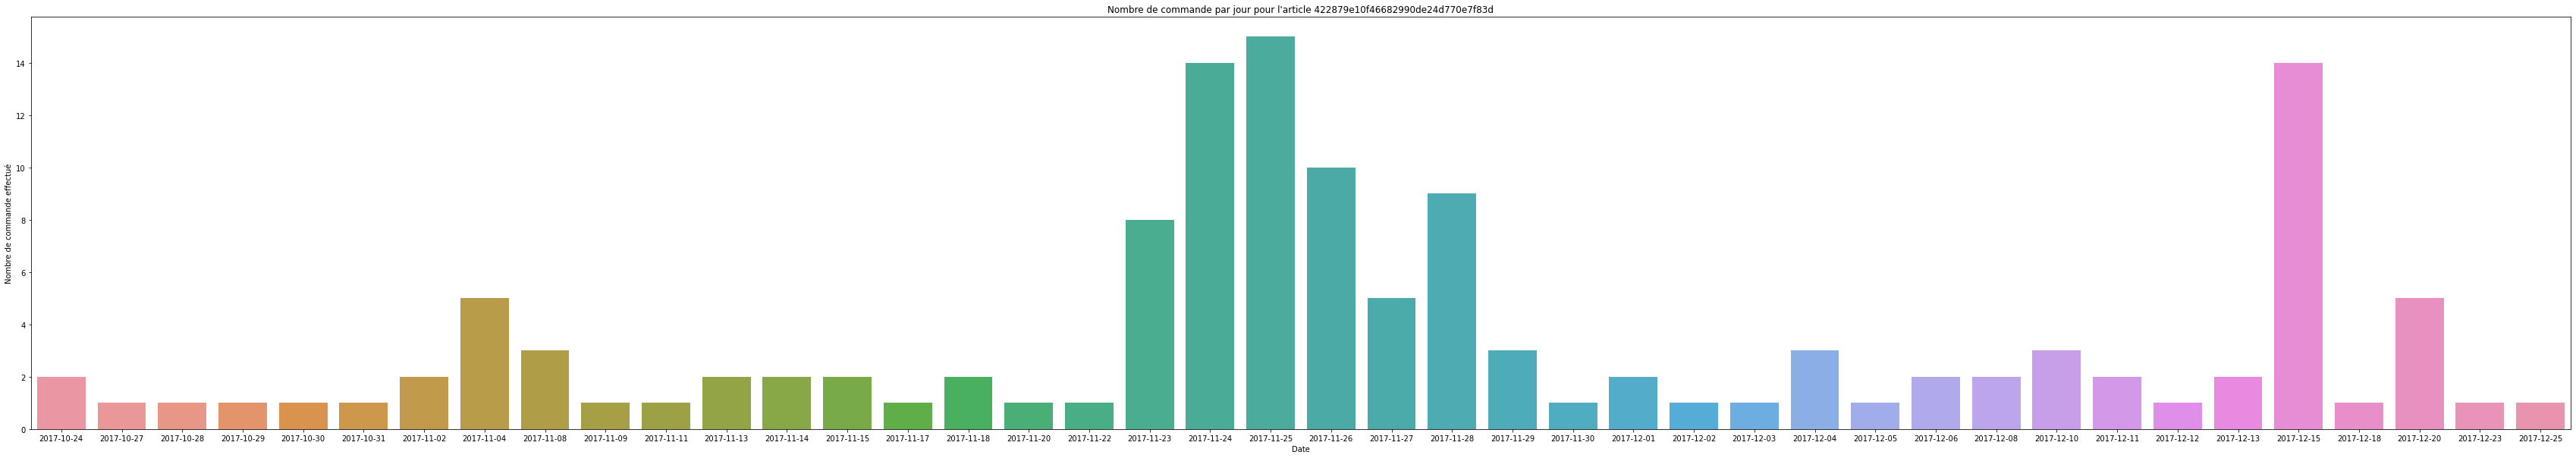

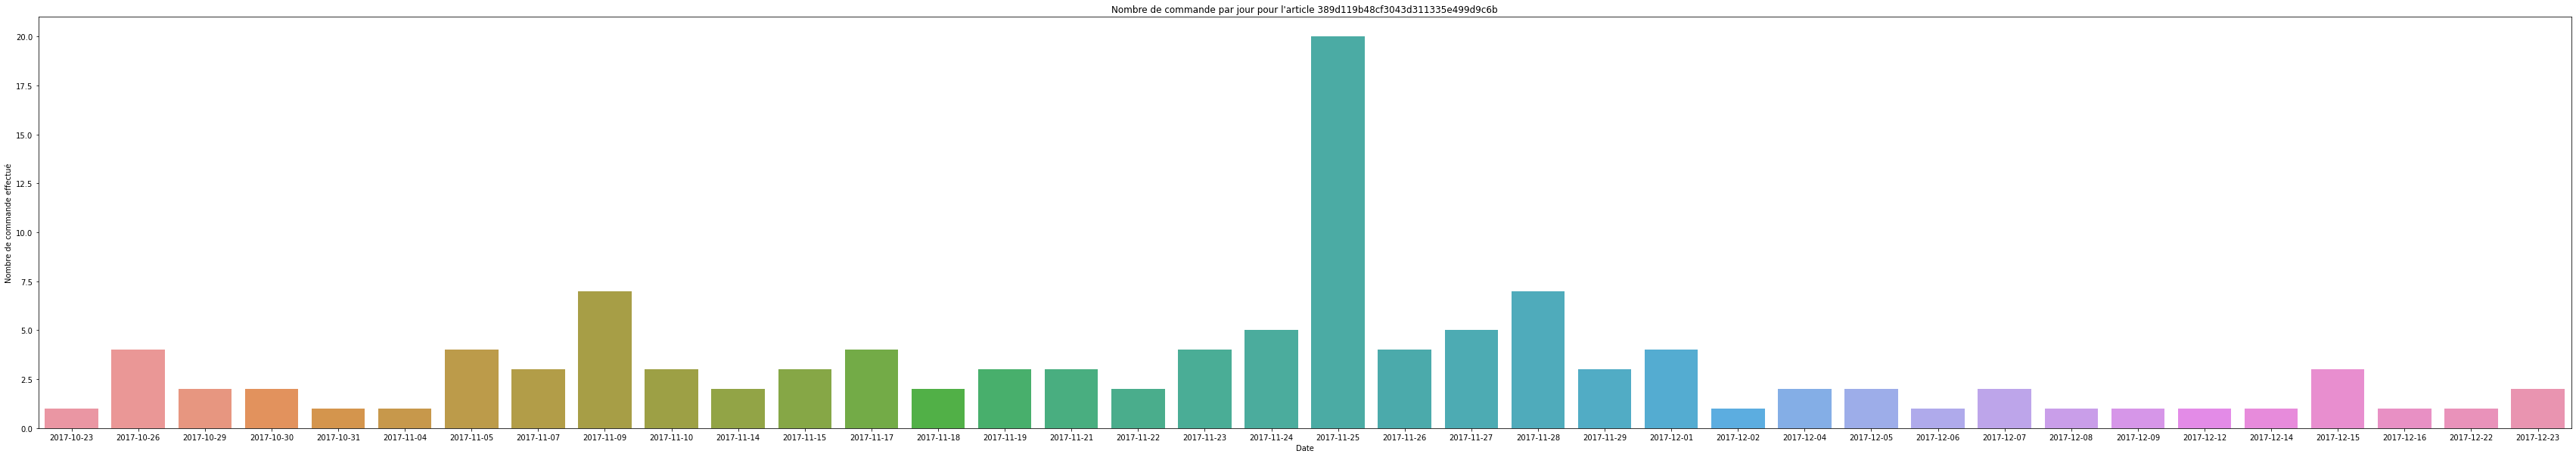

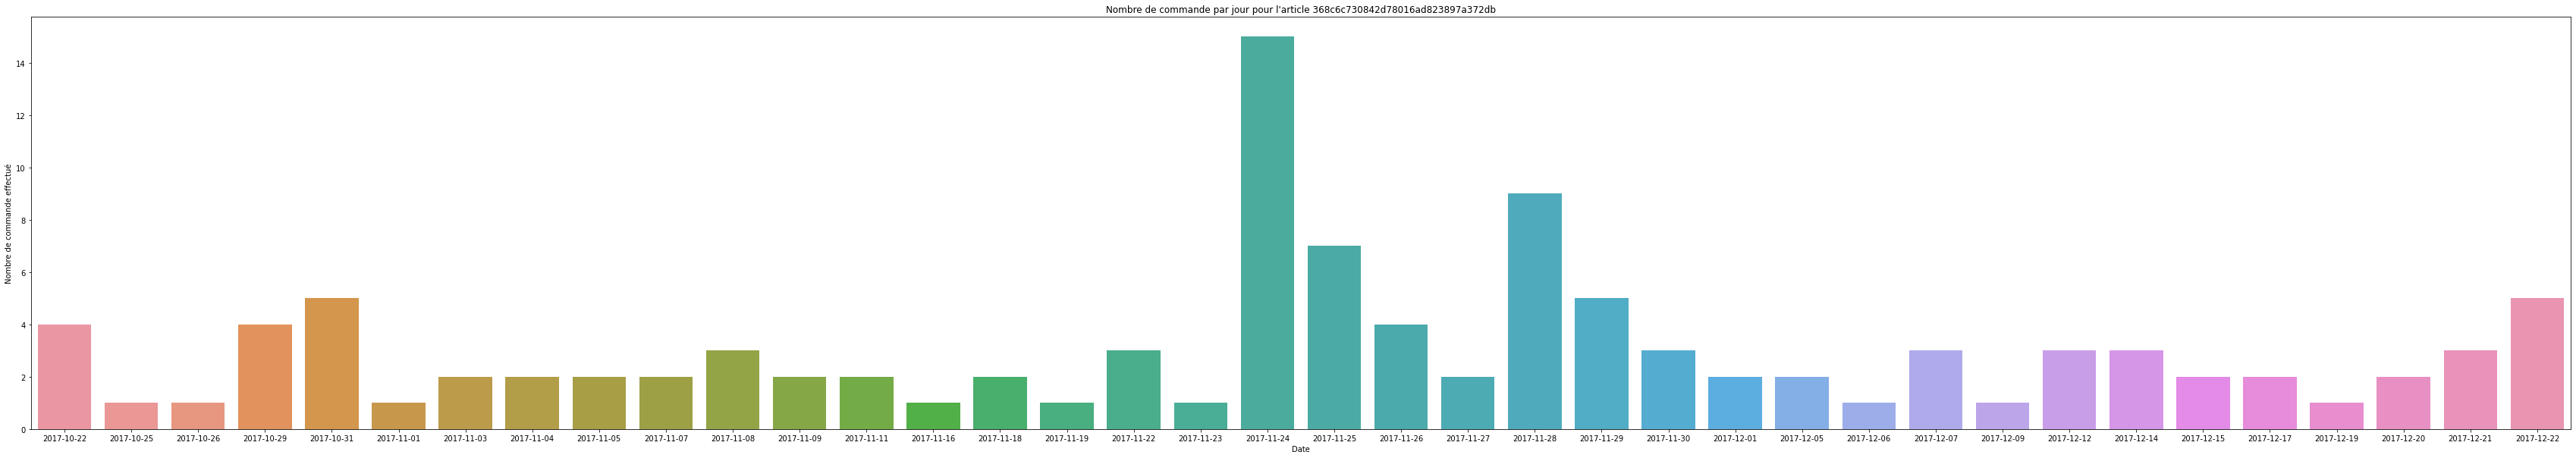

In [101]:
def top_product_by_time_interval(start_date, end_date, number_articles):
    df_tmp = df[df.order_approved_at_ymd.between(start_date, end_date)]
    category_count = df['product_id'].value_counts()[:number_articles]
    category_list = category_count.index.tolist()
    for i in category_list:
        try:
            plt.figure(figsize=(60,10))
            sns.countplot(data=df_tmp[df_tmp['product_id']==i], x='order_approved_at_ymd')
            plt.ylabel("Nombre de commande effectué")
            plt.xlabel("Date")
            plt.title("Nombre de commande par jour pour l'article %s" % i)
            plt.show()
        except:
            print()
    return None

top_product_by_time_interval('2017-10-22 00:00:00', '2017-12-25 00:00:00', 5)

In [ ]:
def plot_product_id(product_id):
    df_tmp = df[df['product_id']==i]
    try:
        plt.figure(figsize=(60,10))
        sns.countplot(data=df_tmp, x='order_approved_at_ym')
        plt.ylabel("Nombre de commande effectué")
        plt.xlabel("Date")
        plt.title("Nombre de commande par mois pour l'article %s" % i)
        plt.show()
        plt.figure(figsize=(100,10))
        sns.countplot(data=df_tmp, x='order_approved_at_ymd')
        plt.ylabel("Nombre de commande effectué")
        plt.xlabel("Date")
        plt.title("Nombre de commande par jour pour l'article %s" % i)
        plt.show()
    except:
        print()
    return None
plot_product_id('53b36df67ebb7c41585e8d54d6772e08')

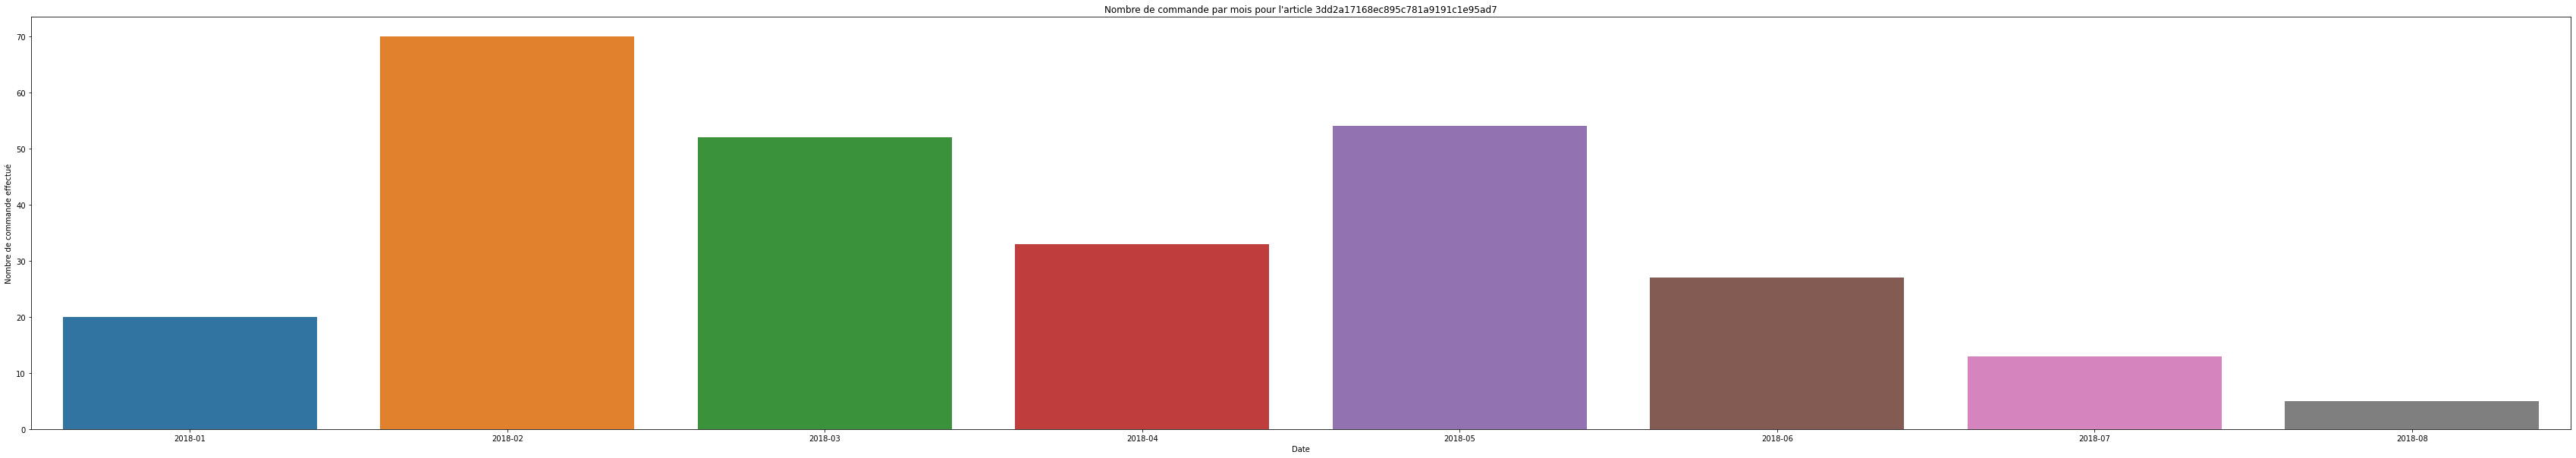

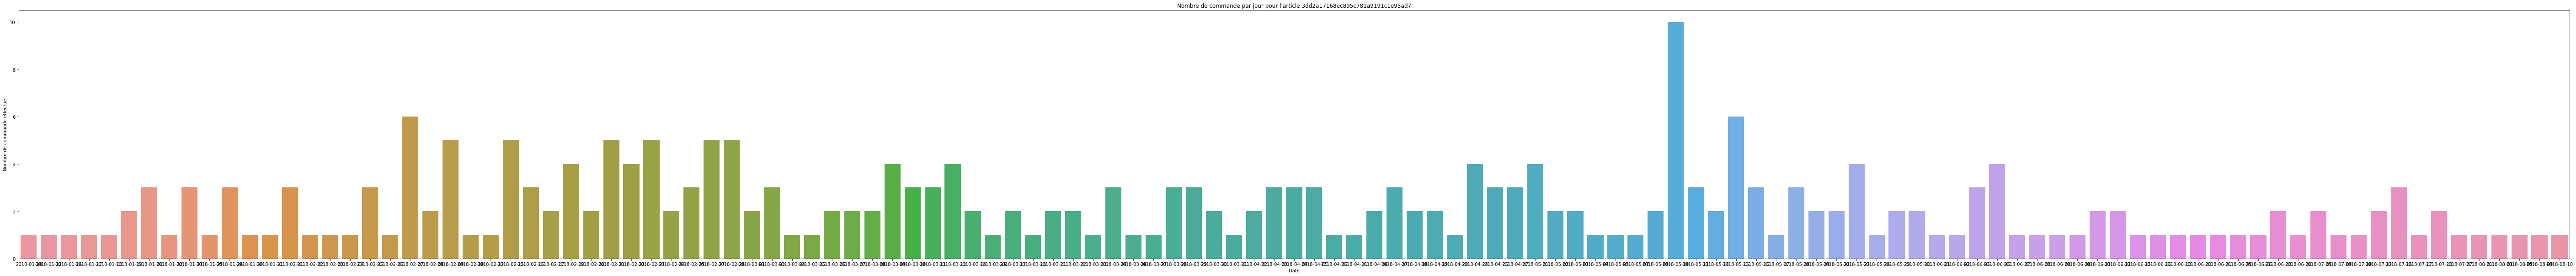